In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

2024-01-20 03:31:30.325646: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-20 03:31:30.326031: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-20 03:31:30.327905: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-20 03:31:30.502316: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Image preprocessing configuration
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values
)

# Specify the target size of your images
target_size = (32, 32)  # Adjust based on your model's input size

# Create a generator for reading images from the training directory
train_generator = train_datagen.flow_from_directory(
    '../datasetcombined/Train',
    target_size=target_size,
    batch_size=128,
    class_mode='binary'      
)

# Image preprocessing configuration for the test set (only normalization)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a generator for reading images from the test directory
test_generator = test_datagen.flow_from_directory(
    '../datasetcombined/Test',
    target_size=target_size,
    batch_size=128,
    class_mode='binary'      
)

Found 151649 images belonging to 2 classes.
Found 56693 images belonging to 2 classes.


In [3]:
def lenet (input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=input_shape))

    model.add(layers.BatchNormalization())

    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    
    model.add(layers.BatchNormalization())

    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(120, (5, 5), activation='relu'))

    model.add(layers.BatchNormalization())

    model.add(layers.Dropout(0.1))

    model.add(layers.Flatten())

    model.add(layers.Dense(84, activation='relu'))

    model.add(layers.Dense(2, activation='sigmoid'))

    model.summary()

    return model

In [4]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

input_shape = (32, 32, 3)

# Create the lenet model
model = lenet(input_shape)

optimizer = Adam(learning_rate=0.001)  

# Compile the model
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
earlystop = EarlyStopping(patience=10)

# Learning rate reduction
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

2024-01-20 03:31:38.623500: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:23:00.0/numa_node
Your kernel may have been built without NUMA support.


Model: "sequential"


2024-01-20 03:31:38.863712: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:23:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-20 03:31:38.863757: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:23:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-20 03:31:38.866202: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:23:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-20 03:31:38.866238: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:23:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-20 03:31:38.866258: I tensorflow/compile

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 6)         24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 batch_normalization_1 (Bat  (None, 10, 10, 16)        64        
 chNormalization)                                                
                                                                 
 max_pooli

In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=test_generator,
    validation_steps=int(len(test_generator) * 0.1),  # Set validation steps to 10% of the dataset
    verbose=1,
    callbacks=callbacks
)

Epoch 1/20


2024-01-20 03:31:42.186162: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-01-20 03:31:42.907630: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8902
2024-01-20 03:31:43.357544: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-20 03:31:44.603935: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-20 03:31:45.693317: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f53fc04ef50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-20 03:31:45.693377: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute C

100/100 [==============================] - 17s 99ms/step - loss: 0.2936 - accuracy: 0.8707 - val_loss: 0.6608 - val_accuracy: 0.5769 - lr: 0.0010
Epoch 2/20
100/100 [==============================] - 10s 102ms/step - loss: 0.1560 - accuracy: 0.9394 - val_loss: 0.4887 - val_accuracy: 0.7718 - lr: 0.0010
Epoch 3/20
100/100 [==============================] - 9s 93ms/step - loss: 0.1207 - accuracy: 0.9527 - val_loss: 0.3658 - val_accuracy: 0.8274 - lr: 0.0010
Epoch 4/20
100/100 [==============================] - 8s 76ms/step - loss: 0.1141 - accuracy: 0.9545 - val_loss: 0.5153 - val_accuracy: 0.8127 - lr: 0.0010
Epoch 5/20
100/100 [==============================] - 6s 61ms/step - loss: 0.0960 - accuracy: 0.9629 - val_loss: 0.4612 - val_accuracy: 0.8336 - lr: 0.0010
Epoch 6/20
100/100 [==============================] - 6s 62ms/step - loss: 0.0813 - accuracy: 0.9697 - val_loss: 0.4336 - val_accuracy: 0.8503 - lr: 0.0010
Epoch 7/20
100/100 [==============================] - 6s 59ms/step - los

In [6]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('Test accuracy:', test_acc*100)
print('Test loss:', test_loss*100)

443/443 - 11s - loss: 0.3906 - accuracy: 0.8823 - 11s/epoch - 24ms/step
Test accuracy: 88.23134899139404
Test loss: 39.05688226222992


In [ ]:
# visualize the validation loss and the validation accuracy to see if the model is overfitting

import matplotlib.pyplot as plt

# Get training and test loss histories

training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')


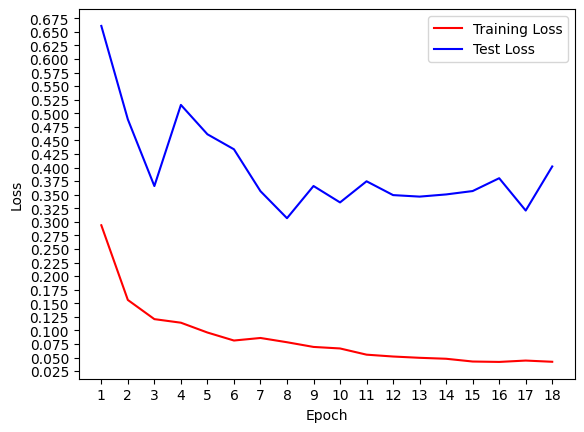

In [36]:
# Visualize test accuracy and test loss

import matplotlib.pyplot as plt

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']
test_acc = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history

plt.yticks(np.arange(0, 1, .025))
plt.xticks(np.arange(1, 20, 1))
plt.plot(epoch_count, training_loss, 'r-')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();



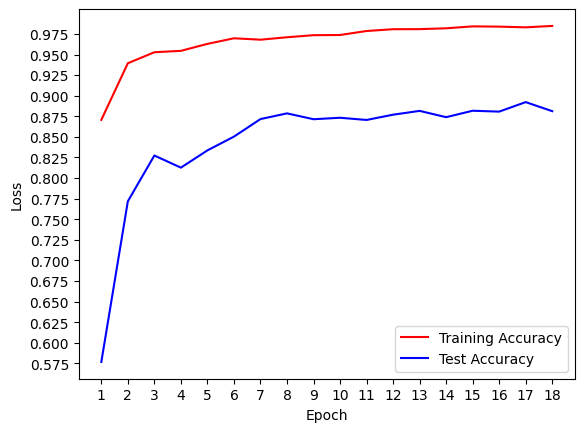

In [34]:


# Get training and test loss histories
test_acc = history.history['val_accuracy']
training_acc = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history

# scale values to range [0,1] with increments of .1
plt.yticks(np.arange(0, 1, .025))
plt.xticks(np.arange(1, 20, 1))
plt.plot(epoch_count, training_acc, 'r-')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();



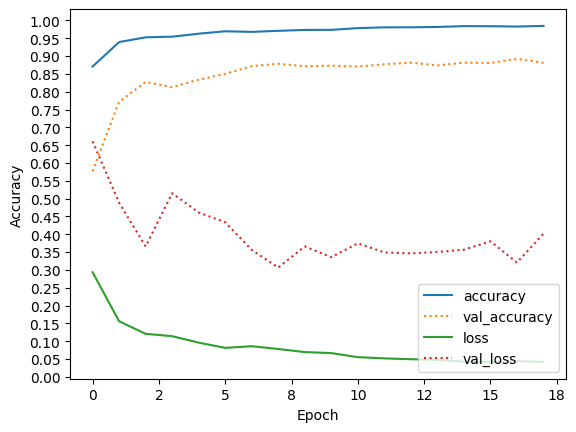

In [8]:
# visualize model accuracy and loss, and validation accuracy and loss as dotted lines

import matplotlib.pyplot as plt

# set y-axis decimal points to 2

plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))

# set y-axis labels to every 0.05

plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.05))


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy', linestyle='dotted')  # Set linestyle to 'dotted'
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss', linestyle='dotted')  # Set linestyle to 'dotted'
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()



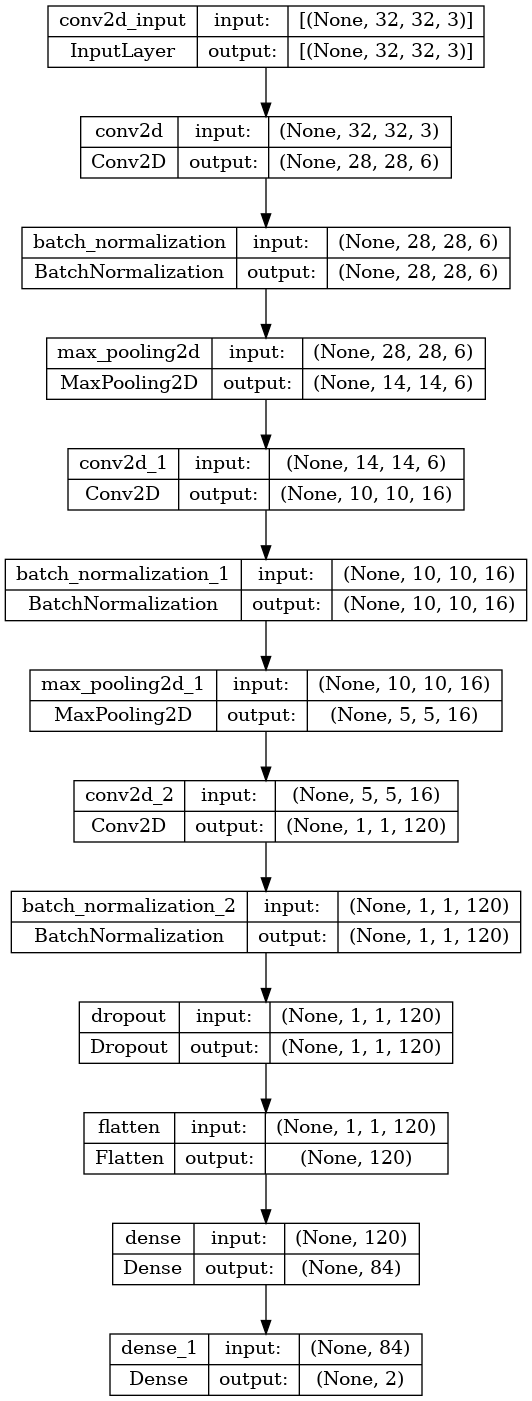

In [11]:
# visualize the model architecture

from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)



443/443 [==============================] - 9s 20ms/step


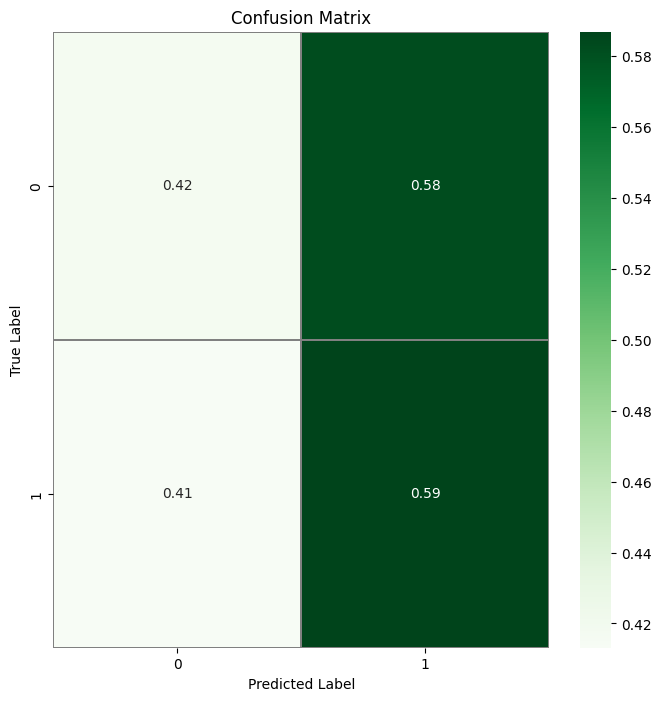

In [12]:
# confusion matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the values from the validation dataset
Y_pred = model.predict(test_generator)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = test_generator.classes
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# normalize the confusion matrix
confusion_mtx = confusion_mtx.astype("float") / confusion_mtx.sum(axis=1)[:, np.newaxis]
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.2f',ax=ax, annot_kws={"size": 10})
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



In [13]:
# evaluate precision, recall, f1-score

from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.35      0.42      0.38     19557
           1       0.66      0.59      0.62     37136

    accuracy                           0.53     56693
   macro avg       0.50      0.50      0.50     56693
weighted avg       0.55      0.53      0.54     56693



In [16]:
# save the model

model.save('model.h5') 



/home/peanuts/project/fyp/.venv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
model.save('my_model.keras')

In [ ]:
# try out classifying an image file

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# load the image file
img = image.load_img('../datasetcombined/Test/Normal/IM-0001-0001.jpeg', target_size=(32, 32))

# convert to numpy array
img = image.img_to_array(img)

# reshape to 1 sample x 32 x 32 x 3
img = img.reshape(1, 32, 32, 3)

# prepare pixel data

img = img.astype('float32')

img = img / 255.0

# predict the class
result = model.predict_classes(img)

print(result[0])
